<a href="https://colab.research.google.com/github/AashiDutt/AI-and-ML-for-Coders/blob/main/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This repository contains code for:

1.Creating a text classifier with RNNs

2.Using Pre-Trained Model

GloVe - Global Vectors for Word Representation

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
from bs4 import BeautifulSoup
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json
  
import json

with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

sentences = [] #headline in dataset
labels = [] #is_sarcastic
urls = [] #article_link

for item in datastore:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  words = sentence.split()
  filtered_sentence = ""
  for word in words:
      word = word.translate(table)
      if word not in stopwords:
          filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

--2022-02-09 07:01:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2022-02-09 07:01:57 (39.1 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
print(len(sentences))

26709


In [ ]:
#total sentences = 26709  (Train-Test split)
training_size = 23000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:

vocab_size = 20000
max_length = 85 #100 ; len of less than 200 sentences is 100 or greater -->introduces lot of unnecessary padding
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding = 'post' )

print(word_index)

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'not': 5, 'just': 6, 'will': 7, 'one': 8, 'year': 9, 'report': 10, 'area': 11, 'donald': 12, 'day': 13, 'u': 14, 's': 15, 'can': 16, 'says': 17, 'woman': 18, 'first': 19, 'time': 20, 'like': 21, 'no': 22, 'get': 23, 'old': 24, 'trumps': 25, 'off': 26, 'now': 27, 'life': 28, 'obama': 29, 'people': 30, 'house': 31, 'women': 32, 'white': 33, 'back': 34, 'still': 35, 'make': 36, 'clinton': 37, '5': 38, 'world': 39, 'americans': 40, 'years': 41, 'way': 42, 'family': 43, 'black': 44, 'study': 45, 'gop': 46, 'best': 47, 'bill': 48, 'american': 49, 'school': 50, 'police': 51, 'watch': 52, '3': 53, 'show': 54, 'really': 55, 'president': 56, 'home': 57, 'last': 58, 'video': 59, 'finds': 60, 'death': 61, 'cant': 62, 'know': 63, '10': 64, 'things': 65, 'good': 66, 'going': 67, 'state': 68, 'hillary': 69, 'love': 70, 'nation': 71, 'may': 72, '2': 73, 'health': 74, 'say': 75, 'parents': 76, 'big': 77, 'every': 78, 'right': 79, 'work': 80, '000': 81, 'need

In [ ]:
#Converting sequences to numpy array

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences = True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
                             tf.keras.layers.Dense(24, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
                            ])

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.000008, #replaced 0.00001
                                beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

model.compile(loss = 'binary_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,447,985
Trainable params: 1,447,985
No

In [ ]:
history = model.fit(training_padded, training_labels, epochs = 30, validation_data=(testing_padded, testing_labels), verbose = 2)

Epoch 1/30
719/719 - 36s - loss: 0.6893 - accuracy: 0.5564 - val_loss: 0.6843 - val_accuracy: 0.5700 - 36s/epoch - 50ms/step
Epoch 2/30
719/719 - 23s - loss: 0.6835 - accuracy: 0.5596 - val_loss: 0.6798 - val_accuracy: 0.5700 - 23s/epoch - 32ms/step
Epoch 3/30
719/719 - 23s - loss: 0.6808 - accuracy: 0.5596 - val_loss: 0.6765 - val_accuracy: 0.5700 - 23s/epoch - 32ms/step
Epoch 4/30
719/719 - 23s - loss: 0.6768 - accuracy: 0.5596 - val_loss: 0.6728 - val_accuracy: 0.5751 - 23s/epoch - 32ms/step
Epoch 5/30
719/719 - 23s - loss: 0.6677 - accuracy: 0.5722 - val_loss: 0.6627 - val_accuracy: 0.6309 - 23s/epoch - 32ms/step
Epoch 6/30
719/719 - 23s - loss: 0.6425 - accuracy: 0.6481 - val_loss: 0.6440 - val_accuracy: 0.6778 - 23s/epoch - 32ms/step
Epoch 7/30
719/719 - 23s - loss: 0.5760 - accuracy: 0.7221 - val_loss: 0.6279 - val_accuracy: 0.6314 - 23s/epoch - 32ms/step
Epoch 8/30
719/719 - 23s - loss: 0.4917 - accuracy: 0.7695 - val_loss: 0.6049 - val_accuracy: 0.6525 - 23s/epoch - 32ms/step


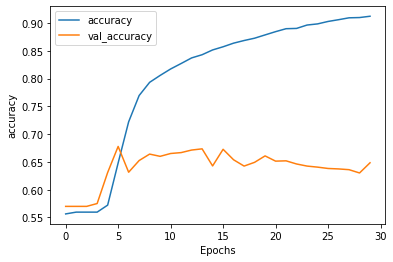

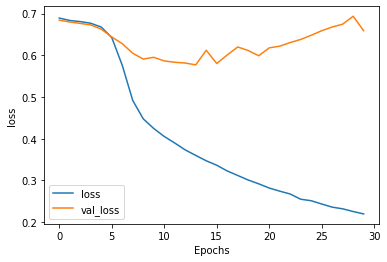

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Using Pre-Trained Model

GloVe - Global Vectors for Word Representation (Example Not Working)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2022-02-10 05:55:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-10 05:55:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-10 05:55:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip -q glove.6B.zip

In [ ]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

FileNotFoundError: ignored

In [ ]:
#Upzip GloVe embeddings file

import os
import zipfile

local_zip = 'glove.6B.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/glove')
zip_ref.close()


In [ ]:
# Each entry in this file is a file followed by dimensional coefficient that were learned for it.
# Make a dictionary for easy use
# word -- key
# embedding -- values

glove_embeddings = dict()
f = open('/tmp/glove/glove.twitter.27B.25d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  glove_embeddings[word] = coefs
f.close

FileNotFoundError: ignored